# Principal Component Analysis (PCA)
... and other methods of data exploration and dimension reduction
## What you will learn
Principal component analysis (PCA) is a method of reducing the number of dimensions of multidimensional data. This can be useful in terms of visualization or to save time / memory in machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltimport seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('whitegrid')

## How do you compare grandma&#39;s wine in the pantry?
The data below contain [13 different characteristics of 178 Italian wines] (https://archive.ics.uci.edu/ml/datasets/wine). Imagine that you want to draw these wines as points in one graph. Alternatively, imagine that your grandmother asked you to put them on the shelves so that &quot;similar&quot; wines were with you and &quot;different&quot; wines as far apart as possible. How do you do something like that?

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(wine_df.shape)
wine_df.head()

(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

One option is to choose a pair of two features that is essential to your data. But what if you don&#39;t know wine? You can, of course, plot all possible pairs.

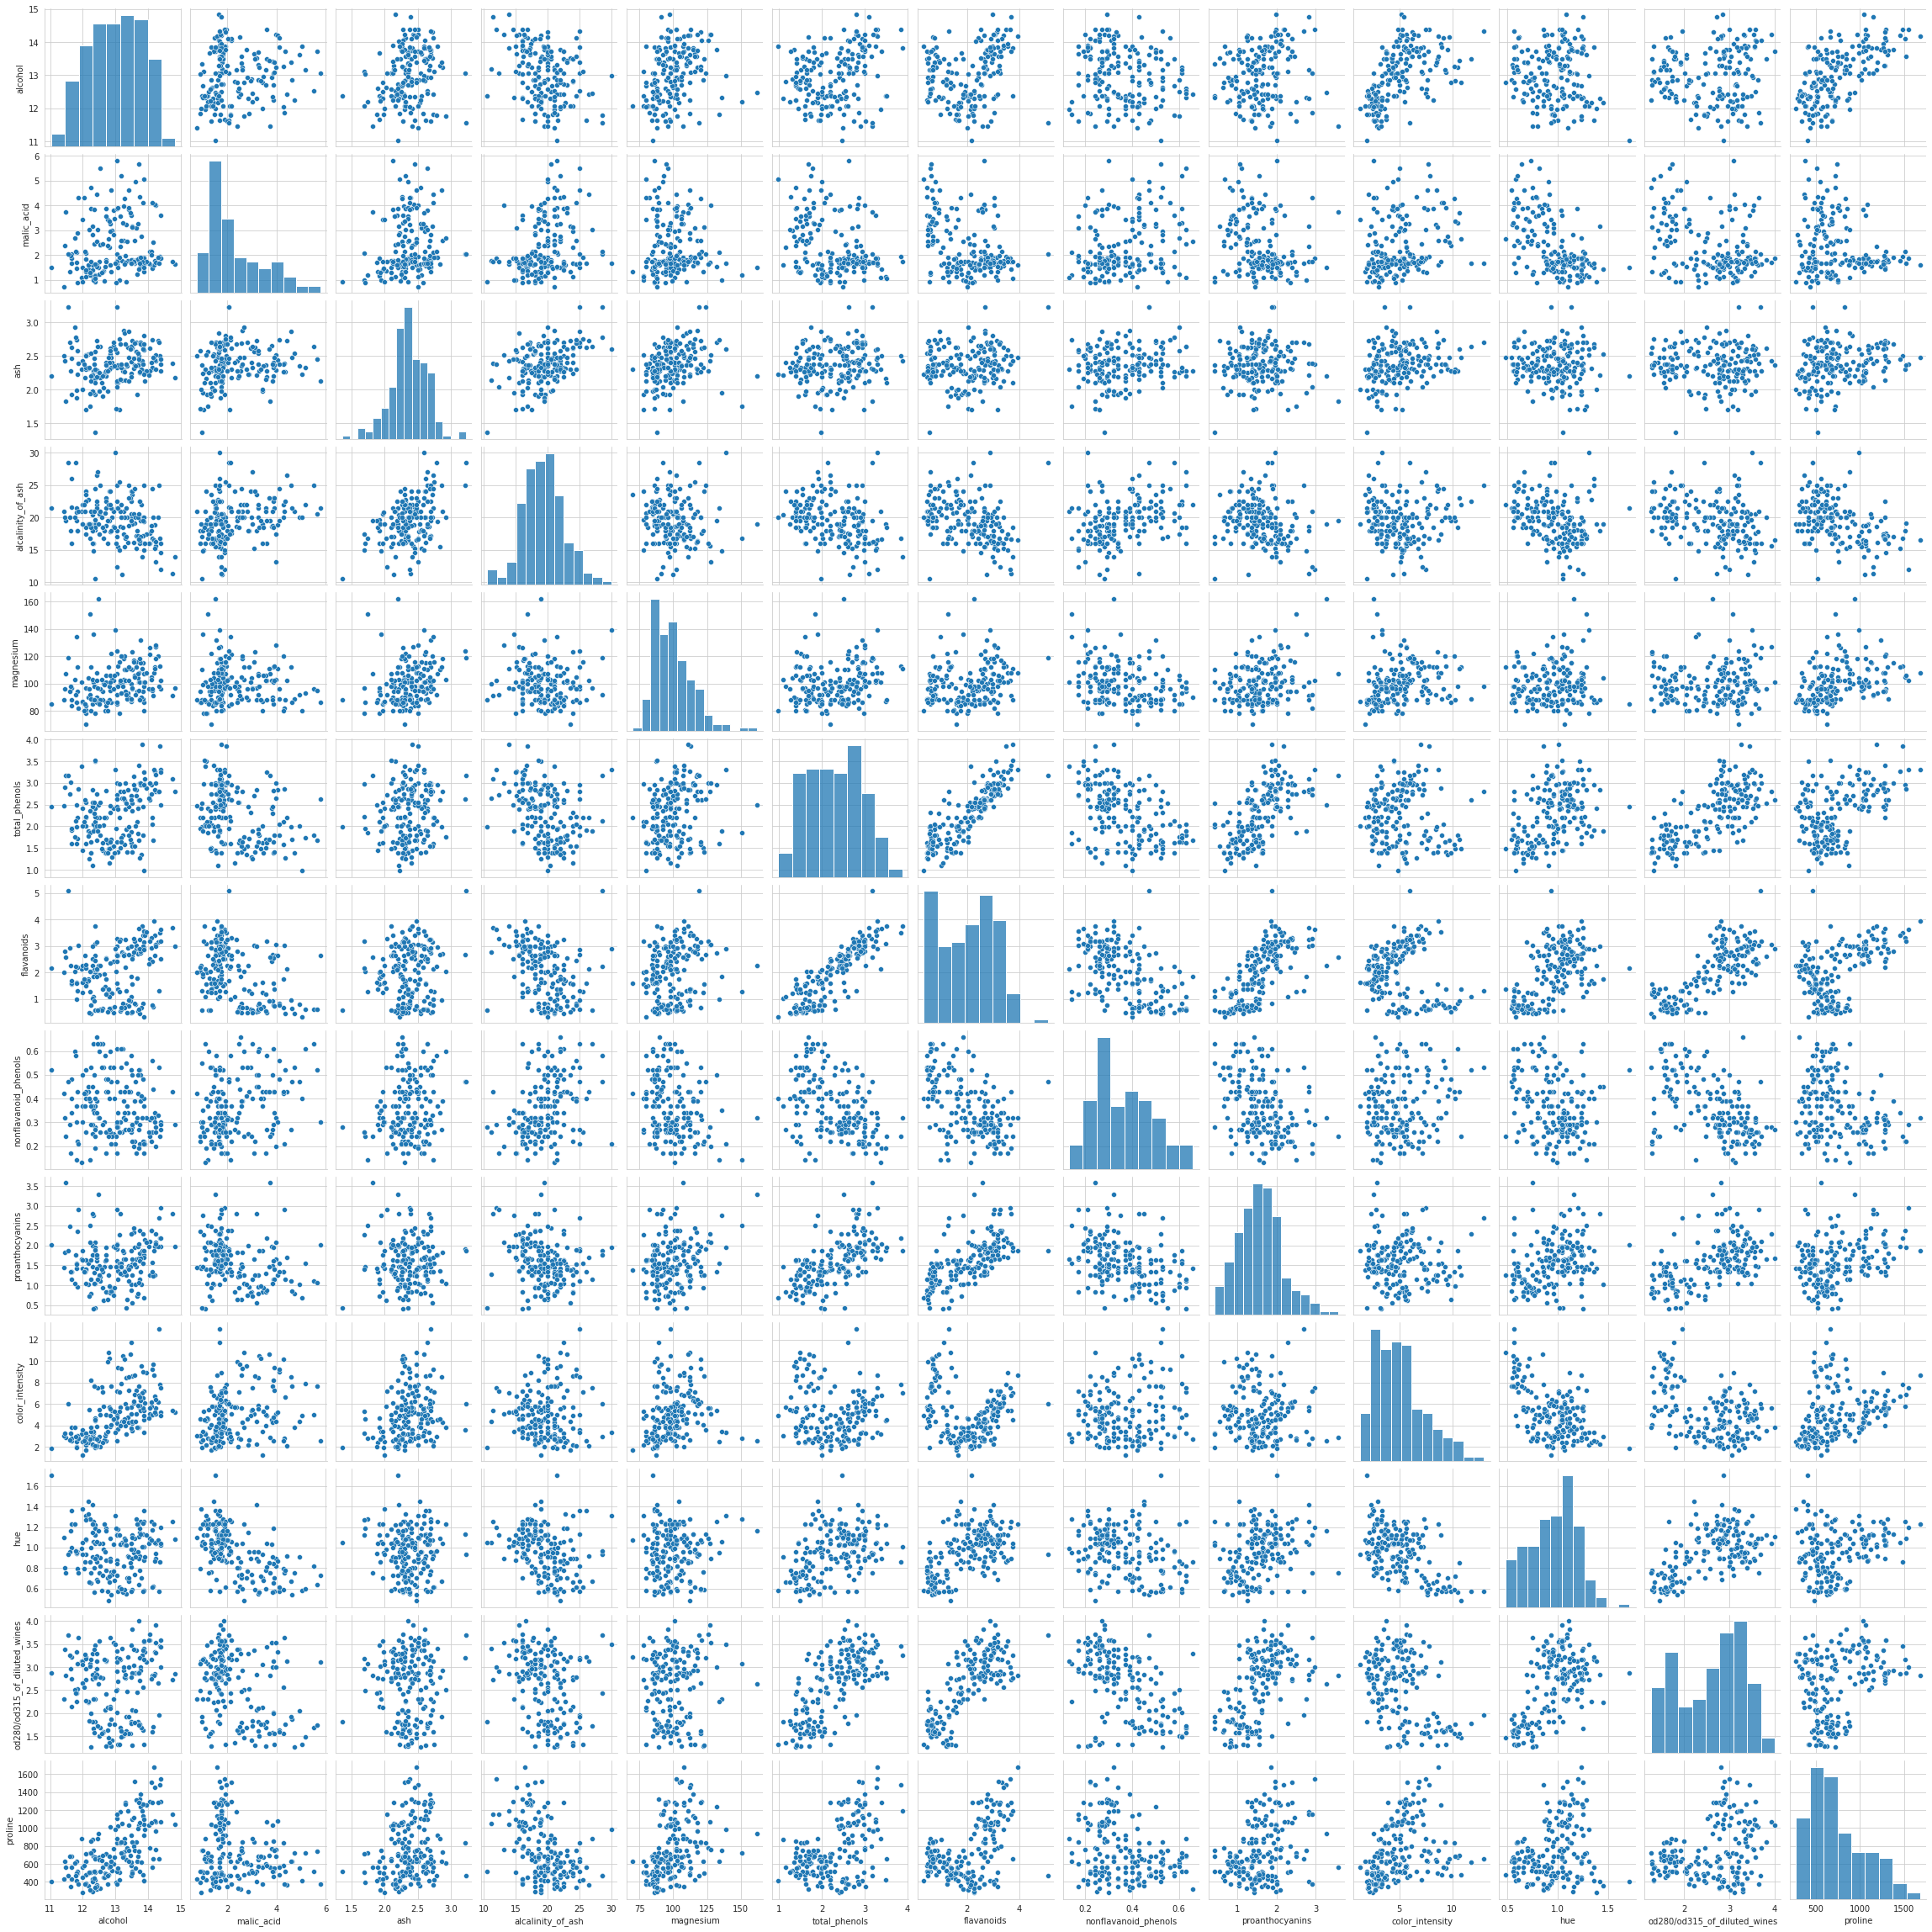

In [3]:
sns.pairplot(wine_df);

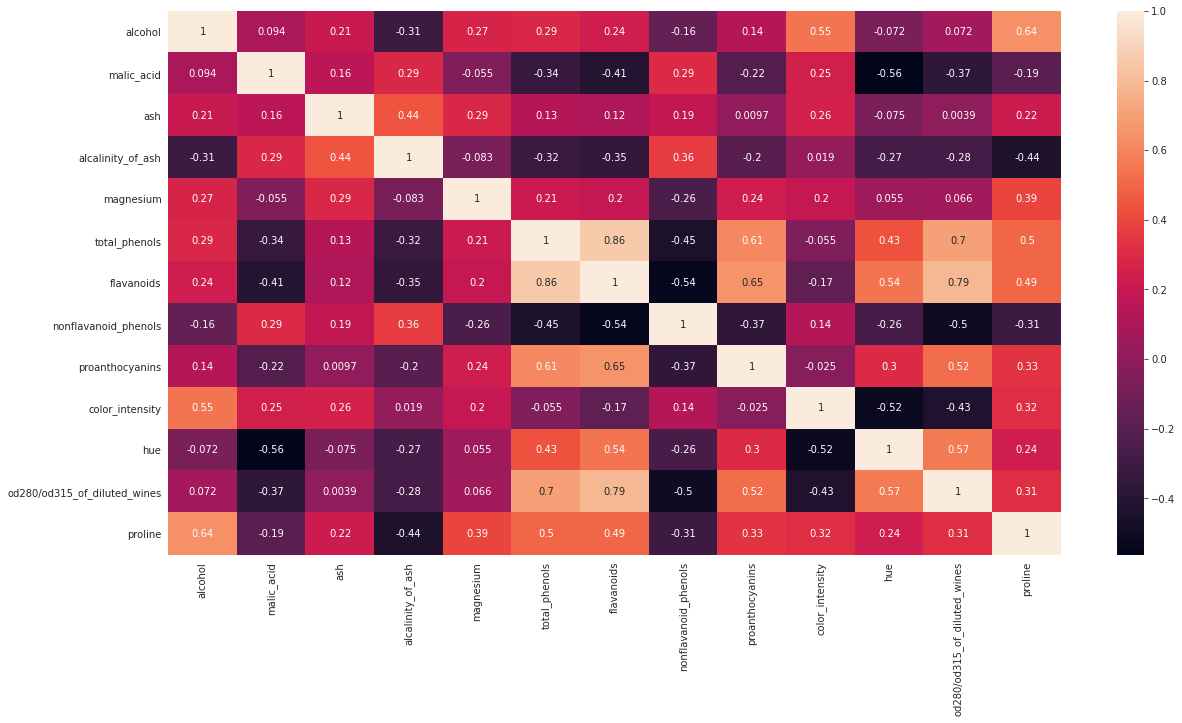

In [4]:
plt.figure(figsize=(20,10)) 
sns.heatmap(wine_df.corr(), annot=True); 

As we can see, many characteristics are correlated (eg `total_phenols` and` flavanoids`). PCA allows you to convert many characteristics (columns) to a few, which a) are independent b) capture the maximum information (variability) in the data.
Because screens and walls in the pantry are usually two-dimensional, we will further (unless otherwise stated) simplify from X characteristics to two so that we can then plot these on the $ x $ and $ y $ axes. Let&#39;s see how it turns out for our wine dataset.
### PCA graf

In [5]:
# This block normalizes the columns in the table to have a mean of zero and a variance of one# If you don&#39;t, the band will play a rolescaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df)

In [6]:
# This block calculates PCA coordinates (we choose simplification for two components)pca = PCA(n_components=2)
wine_pca = pd.DataFrame(pca.fit_transform(wine_df_scaled), columns=['PCA1', 'PCA2'])
wine_pca

PCA1      PCA2
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

/home/petr/.pyenv/versions/3.8.1/envs/pca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


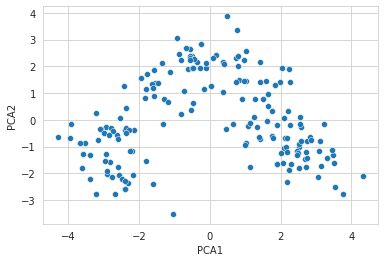

In [7]:
# And this will draw them on the chartsns.scatterplot(wine_pca.PCA1, y=wine_pca.PCA2);

We have completed the task, will Grandma be satisfied? Are similar wines drawn near each other?
There is one more piece of information about wines in our database - wines belong to one of three categories (wine color?). Indeed, if we color the points on the PCA chart according to the wine category, we clearly see three clusters.

/home/petr/.pyenv/versions/3.8.1/envs/pca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


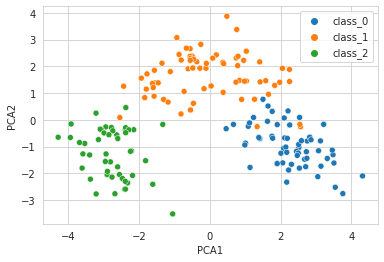

In [8]:
sns.scatterplot(wine_pca.PCA1, y=wine_pca.PCA2, hue=wine.target_names[wine.target]);

### Proportion of captured variability
PCA also allows you to quantify what percentage of variability is captured in the first two PCA components.

In [9]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## Exercise 1: Penguins
For the first exercise, we will use penguin data from Allison Horst, https://github.com/allisonhorst/penguins.
Like RA Fisher&#39;s famous killer whale data, penguin data seeks to be a simple textbook example of mastering basic data manipulation and visualization techniques.

In [10]:
penguins = pd.read_csv('penguins_size_nona.csv')

print(penguins.shape)
penguins.head()

(333, 7)


species     island     sex  culmen_length_mm  culmen_depth_mm  \
0  Adelie  Torgersen    MALE              39.1             18.7   
1  Adelie  Torgersen  FEMALE              39.5             17.4   
2  Adelie  Torgersen  FEMALE              40.3             18.0   
3  Adelie  Torgersen  FEMALE              36.7             19.3   
4  Adelie  Torgersen    MALE              39.3             20.6   

   flipper_length_mm  body_mass_g  
0                181         3750  
1                186         3800  
2                195         3250  
3                193         3450  
4                190         3650

In [11]:
scaler = StandardScaler()
penguins_df_scaled = pd.DataFrame(scaler.fit_transform(penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]),
                                  columns=penguins.columns[3:]) 

penguins_df_scaled.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.896042         0.780732          -1.426752    -0.568475
1         -0.822788         0.119584          -1.069474    -0.506286
2         -0.676280         0.424729          -0.426373    -1.190361
3         -1.335566         1.085877          -0.569284    -0.941606
4         -0.859415         1.747026          -0.783651    -0.692852

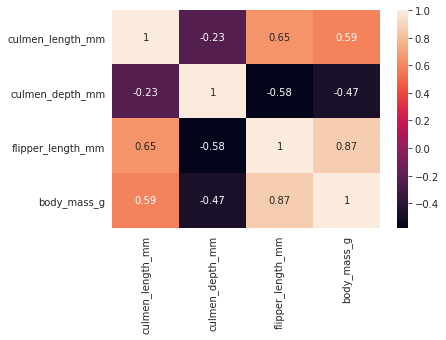

In [12]:
sns.heatmap(penguins_df_scaled.corr(), annot=True); 

![tucnaci](https://i.imgur.com/orZWHly.png)

Reduce these four characteristics to two PCAs, calculate the amount of variability explained, and plot everything in a scatter plot that you color according to the penguin species. Is there a difference between penguin species on the PCA chart? Is there a difference between males and females?

In [13]:
# write a solution here

In [14]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## Breast Cancer Wisconsin Dataset

Breast cancer clinical trial data from the University of Wisconsin. We have a total of 569 patients and in each of them 31 evaluating [FNA breast tissue scan] (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and whether the tumor was malignant or benign.

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
cancer_df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
print(cancer_df.shape)
print(cancer.target_names)
cancer_df.head()

(569, 31)
['malignant' 'benign']


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

Let&#39;s start, as in the previous case, by looking at paired graphs, which this time we will color according to the type of tumor.

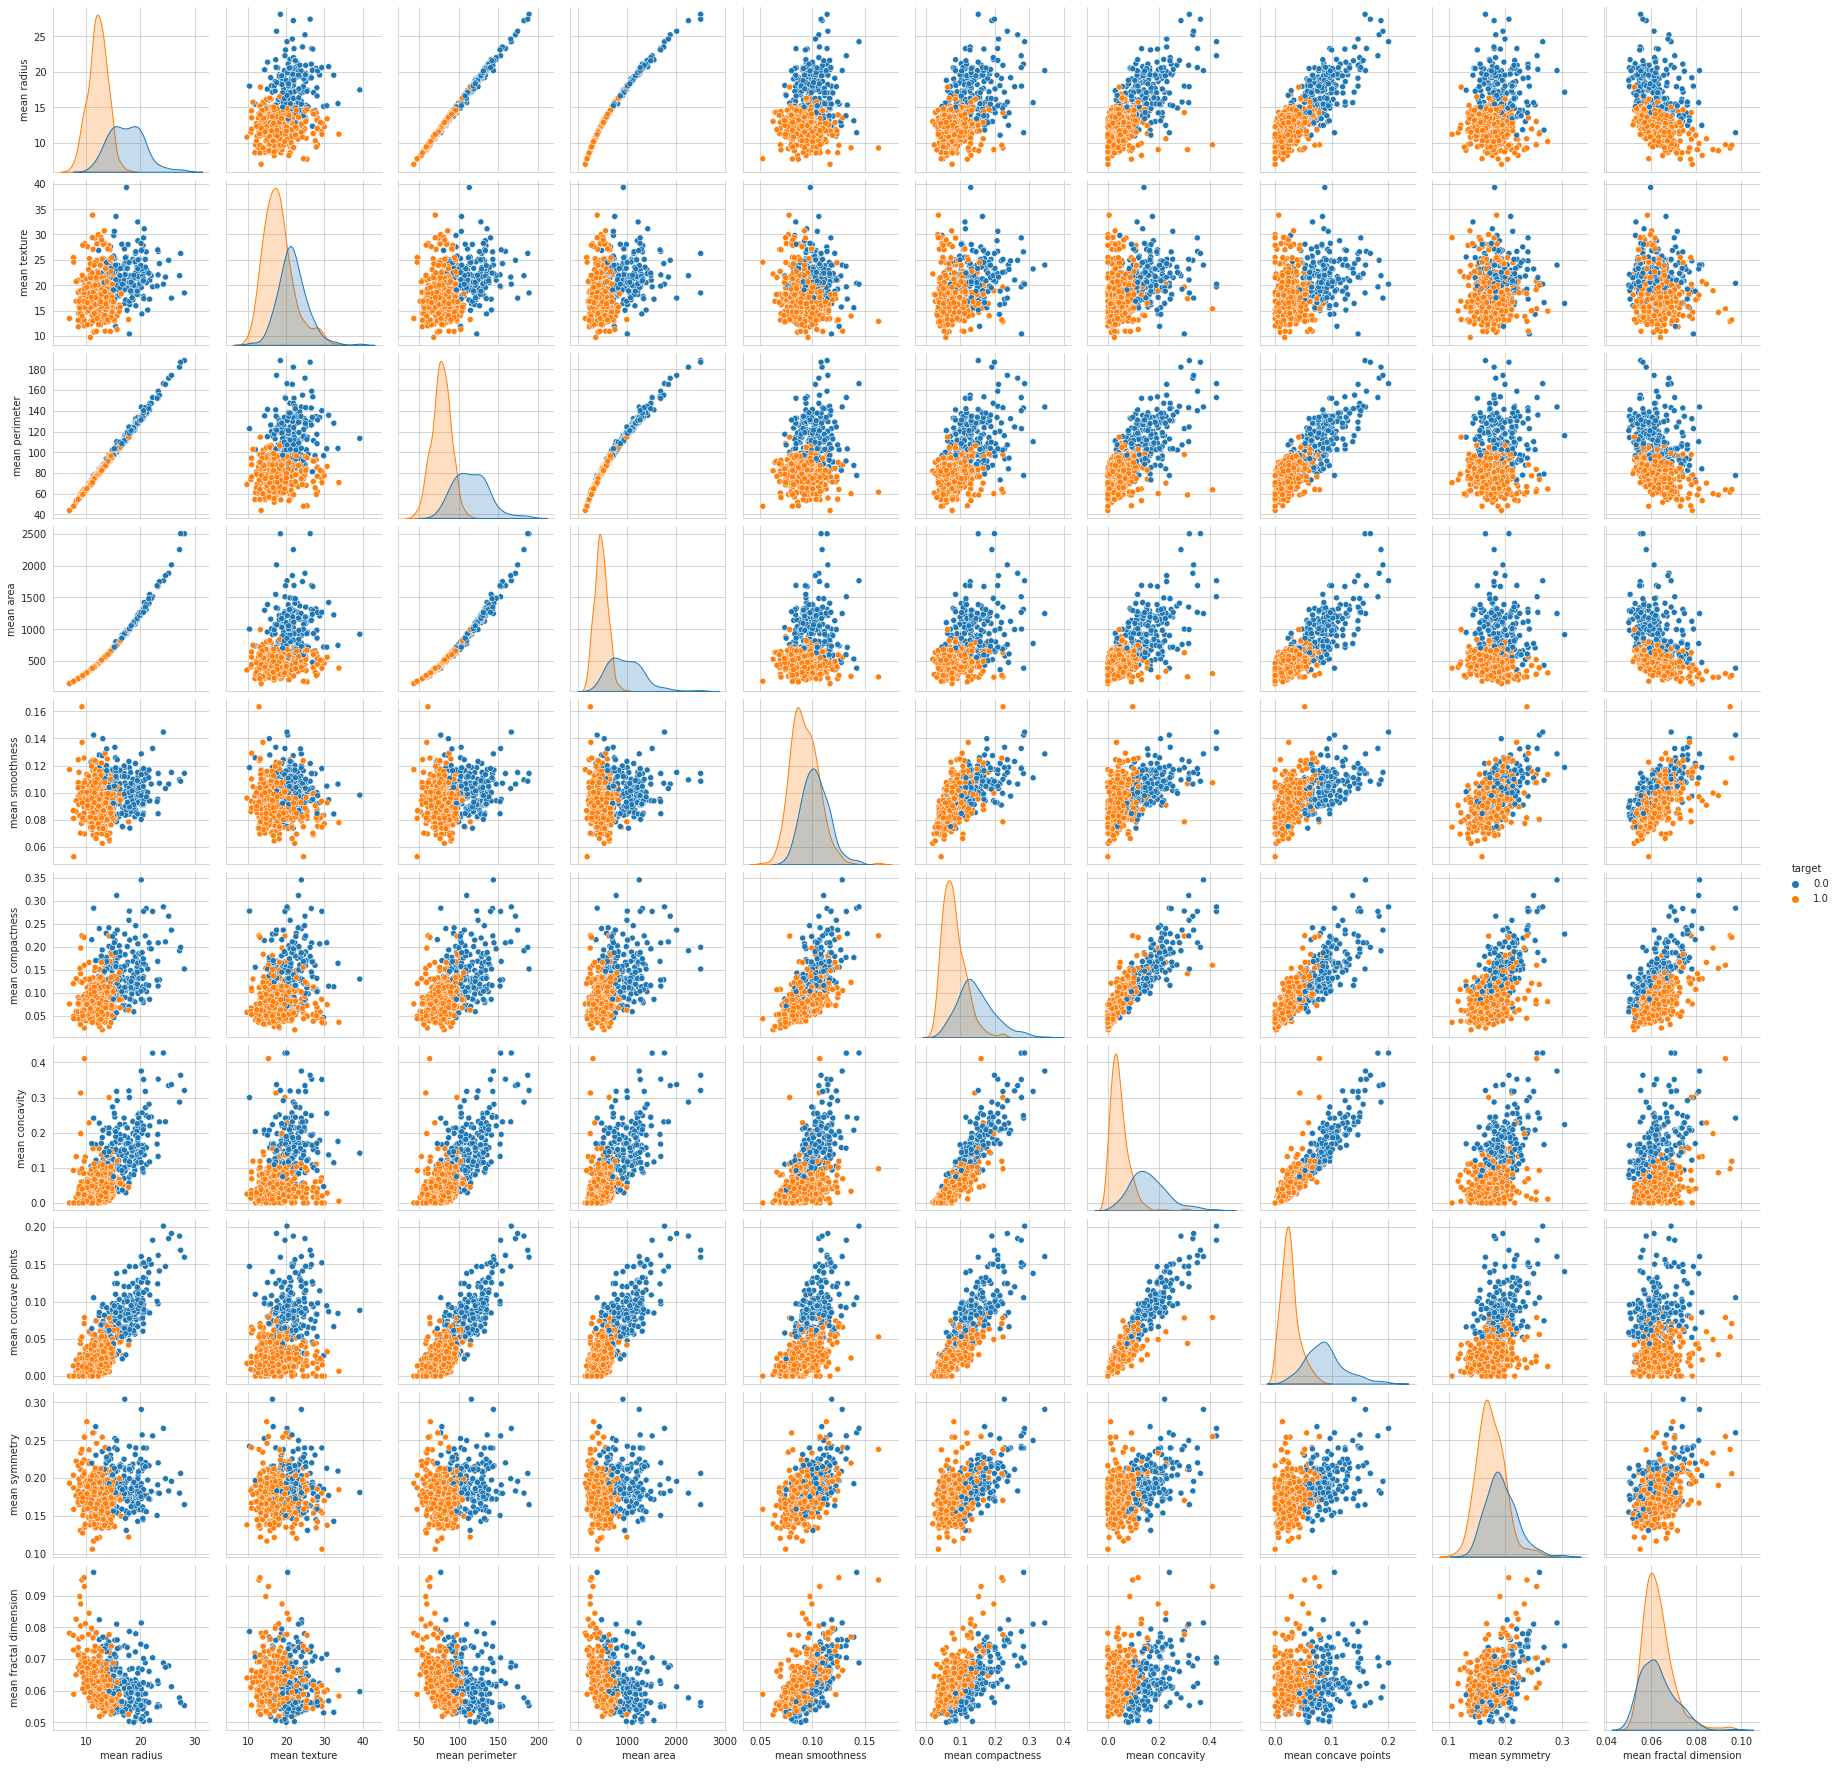

In [16]:
sns.pairplot(cancer_df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension']);

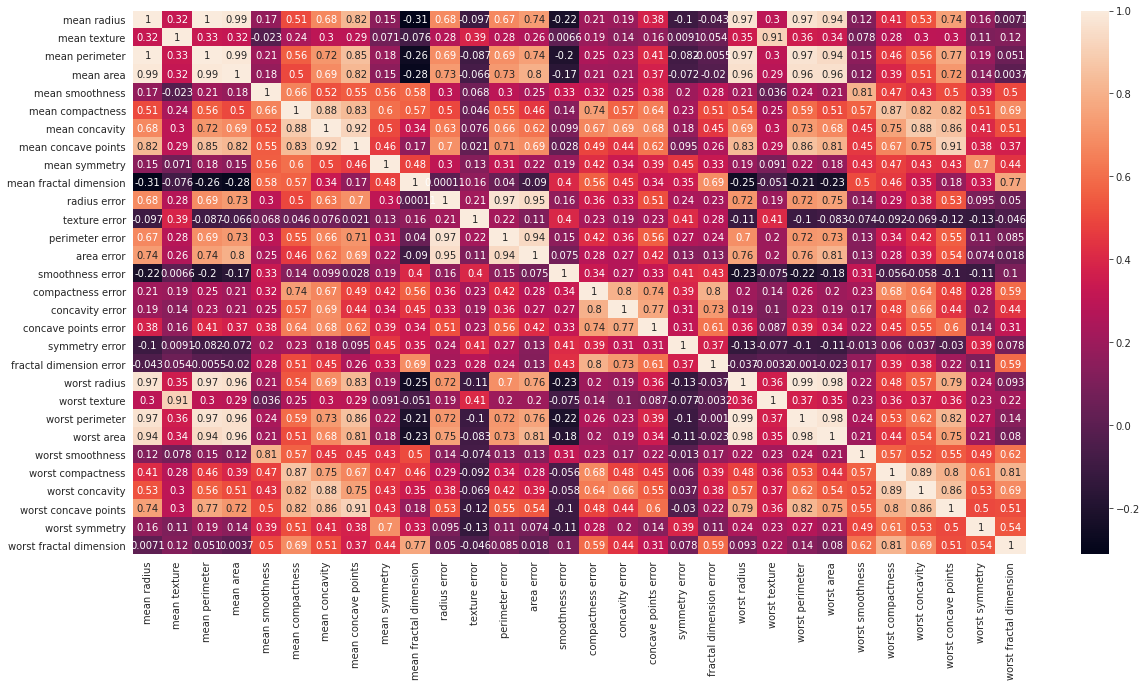

In [17]:
plt.figure(figsize=(20,10)) 
sns.heatmap(cancer_df.drop(columns="target").corr(), annot=True); 

At first glance, we see that some characteristics carry more information than others.

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

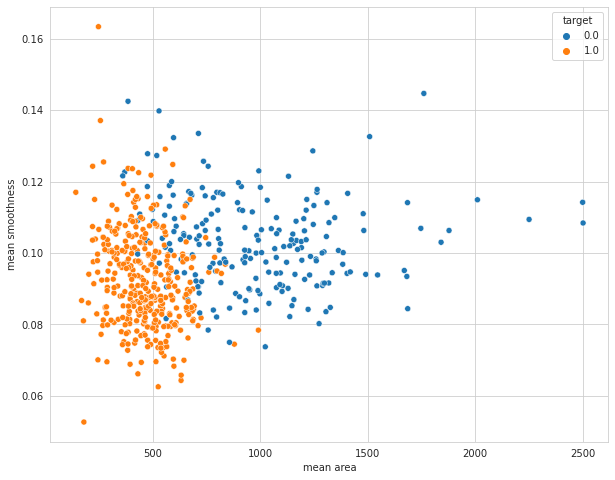

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df)

So now let&#39;s calculate the PCA components, their share of variability and draw a PCA graph.

In [19]:
scaler = StandardScaler()
scaler.fit(cancer_df.drop('target', axis=1))
scaled_data = scaler.transform(cancer_df.drop('target', axis=1))

pd.DataFrame(scaled_data).head()

0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1.307686  2.616665  2.109526  2.296076  2.750622  1.937015  
1 -0.375612 -0.430444 -0.146749  1.087084 -0.243890  0.281190  
2  0.527407  1.082932  0.854974  1.955000  1.152255  0.201391  
3  3.394275  3.893397  1.989588  2.175786  6.046041  4.935010  
4  0.220556 -0.313395  0.613179  0.729259 -0.868353 -0.397100  

[5 rows x 30 columns]

In [20]:
pca = PCA(n_components=2)
cancer_pca = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PCA1', 'PCA2'])
cancer_pca

PCA1       PCA2
0     9.192837   1.948583
1     2.387802  -3.768172
2     5.733896  -1.075174
3     7.122953  10.275589
4     3.935302  -1.948072
..         ...        ...
564   6.439315  -3.576817
565   3.793382  -3.584048
566   1.256179  -1.902297
567  10.374794   1.672010
568  -5.475243  -0.670637

[569 rows x 2 columns]

In [21]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

/home/petr/.pyenv/versions/3.8.1/envs/pca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


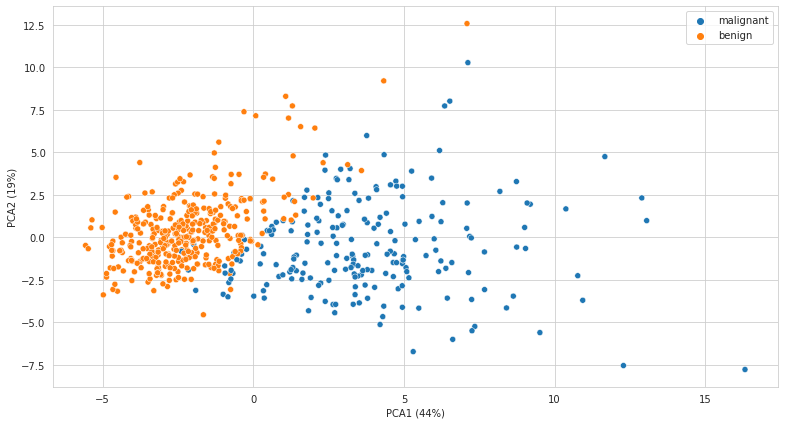

In [22]:
plt.figure(figsize=(13,7))
sns.scatterplot(cancer_pca.PCA1, y=cancer_pca.PCA2, 
                hue=cancer.target_names[cancer.target],
                
               )
plt.xlabel(&#39;PCA1 (44%)&#39;)plt.ylabel(&#39;PCA2 (19%)&#39;);

The PCA graph shows several orange (benign) dots in the middle of the blue (malignant) area. It might be a good idea to look at these patients in more detail. But how do we find out how many lines a point corresponds to? We need an interactive chart!
### Interactive PCA chart

In [23]:
import plotly
import plotly.express as px

In [24]:
# There is no Patient ID in our data, so we will create somecancer_df['patient'] = ['Patient' + str(i) for i in range(cancer_df.shape[0])]
cancer_df['patient']

0        Patient0
1        Patient1
2        Patient2
3        Patient3
4        Patient4
          ...    
564    Patient564
565    Patient565
566    Patient566
567    Patient567
568    Patient568
Name: patient, Length: 569, dtype: object

In [25]:
# naucse.python.cz cannot display the interactive graph, so it is commented belowfig = px.scatter(x=cancer_pca.PCA1, y=cancer_pca.PCA2, color=cancer.target_names[cancer.target],
                 hover_name = cancer_df['patient'])
# fig.show () # uncomment to draw the image

### Interpretation of coefficients
Without going too far into the mathematical nature of PCA, each of our artificial components is in fact a linear combination of individual characteristics (after normalization), e.g.
$$ \ texttt {PCA} _1 = \ beta_0 + \ beta_1 * \ texttt {Property (1)} + \ beta_2 * \ texttt {Property (2)} + \ cdots + \ beta_k * \ texttt {Property (k)} $$
If we normalized the columns using `StandardScaler`, we can interpret the size of the coefficients (in absolute value) to some extent as how much the given property contributes to the PCA component. However, be careful in this interpretation (it&#39;s easy to see something in the data that isn&#39;t really there).

In [26]:
loadings = pd.DataFrame(pca.components_.T, index=cancer_df.columns[:-2], columns=cancer_pca.columns) 
loadings.sort_values('PCA1', ascending=False).head(n=10)

PCA1      PCA2
mean concave points   0.260854 -0.034768
mean concavity        0.258400  0.060165
worst concave points  0.250886 -0.008257
mean compactness      0.239285  0.151892
worst perimeter       0.236640 -0.199878
worst concavity       0.228768  0.097964
worst radius          0.227997 -0.219866
mean perimeter        0.227537 -0.215181
worst area            0.224871 -0.219352
mean area             0.220995 -0.231077

We were inspired by the code section in this section at https://www.kaggle.com/faressayah/support-vector-machine-pca-tutorial. Kaggle is not only a competition server, but also a very good source of inspiration and instructions. You can try other techniques you know from this course here.

## Exercise 2: The effect of aging on protein expression in the kidneys
For the second exercise, we will use the measurement of protein expression from mouse kidneys. We have a total of 188 mice, which differ in gender (males, females), group (generation, G8-G12) and age (6, 12 or 18 months). More information about the experiment can be found at [https://ytakemon.github.io/TheAgingKidney/analysis.html](https://ytakemon.github.io/TheAgingKidney/analysis.html). Protein names were anonymized.
Based on protein expression, draw a PCA graph and decide if the first two components match any information you have in the records (gender, group, age). If you have time, try to draw an interactive graph.

In [27]:
url_protein_expr = 'http://github.com/simecek/naucse.python.cz/blob/master/lessons/pydata/pca/static/protein_expr.zip?raw=true'
protein_expr = pd.read_csv(url_protein_expr, compression="zip")
print(protein_expr.shape)
protein_expr.head()

(188, 4548)


Mouse_ID Sex Generation    Age  Protein_1  Protein_2  Protein_3  Protein_4  \
0  DO-0661   F         G8  12mos  -0.272366   0.164789  -0.720521  -0.098587   
1  DO-0669   F         G8  18mos   1.860412   0.637867  -0.654035   0.720521   
2  DO-0670   F         G8  12mos  -0.191457   1.006581  -0.864279   0.045949   
3  DO-0673   F         G8  18mos  -1.284541  -1.122194   0.178107   1.490375   
4  DO-0674   F         G8  12mos  -0.498969  -0.590323  -0.621864   2.151794   

   Protein_5  Protein_6  ...  Protein_6696  Protein_6697  Protein_6698  \
0   0.606018   0.383201  ...     -1.790968      0.245224     -0.272366   
1  -0.621864   0.327281  ...      0.383201     -1.531465      0.864279   
2   0.903064  -0.341158  ...     -0.425932     -0.045949     -1.097893   
3  -0.772547   1.575317  ...      0.963935      0.513889      0.670377   
4   0.111784  -0.085408  ...      0.590323      0.590323     -1.122194   

   Protein_6699  Protein_6700  Protein_6702  Protein_6705  Protein_6706  \
0     -0.245224     -0.245224      2.034663      1.255151     -0.178107   
1      0.574773      1.006581      2.559868      0.574773      0.883505   
2     -1.531465      0.341158     -0.245224      0.313466      1.097893   
3      0.703610     -0.111784     -0.808421      0.178107      0.245224   
4     -1.315084     -0.484160      0.138238      0.383201      1.531465   

   Protein_6715  Protein_6716  
0     -1.097893      1.284541  
1      0.218262      0.286012  
2      1.346906      1.006581  
3      0.574773      0.299711  
4      0.397363     -0.590323  

[5 rows x 4548 columns]

In [28]:
# write a solution here

Finally, let&#39;s look at two more strange use cases:
## Digits
Handwritten 1797 digits from 43 people, scaled down to 8x8, brightness intensity from 0 to 16. Like most of our data comes from the [UCI ML Repository] (https://archive.ics.uci.edu/ml/datasets/Optical + Recognition + of + Handwritten + Digits).
Let&#39;s look at one particular digit, what its numerical representation and its image look like.

(1797, 64)
[[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]]


<Figure size 432x288 with 0 Axes>

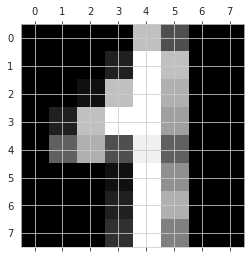

In [29]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as pltdigits = load_digits()

#velicost thatprint(digits.data.shape)

# 42nd digit as a sheetprint(digits.images[42])

# 42nd digit as a pictureplt.gray() 
plt.matshow(digits.images[42].reshape(8,8));

We will convert the data to the table with 1797 rows and 64 columns (and we will verify that the 42nd row is correct).

In [30]:
digits.images[42].reshape(1,64)

array([[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
        12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]])

In [31]:
digits_df = digits.images.reshape(1797,64)
print(digits_df.shape)
digits_df[42,:]

(1797, 64)


array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

And let&#39;s draw a classic PCA graph from the first two components (note that it doesn&#39;t depend on how many `n_components` we choose).

In [32]:
# try changing the number of n_components components and see what happensn_components = 5
pca = PCA(n_components=n_components)
column_names = ["PCA" + str(i) for i in range(1,n_components+1)]

pca.fit(digits.images.reshape(1797,64))
digits_pca = pd.DataFrame(pca.transform(digits_df), columns=column_names)

digits_pca

PCA1       PCA2       PCA3       PCA4       PCA5
0     -1.259466  21.274883  -9.463055  13.014189  -7.128849
1      7.957611 -20.768699   4.439506 -14.893662   5.896363
2      6.991923  -9.955986   2.958558 -12.288302 -18.126072
3    -15.906105   3.332464   9.824372 -12.275839   6.965168
4     23.306867   4.269061  -5.675128 -13.851519  -0.357976
...         ...        ...        ...        ...        ...
1792 -14.606628  13.344124 -13.439048  -6.502947   3.787534
1793   6.464574  20.567299  -9.155110  12.554088  -9.015984
1794  10.801284  -6.960252   5.599555  -7.227730  -3.459572
1795  -4.872100  12.423954 -10.170866  -6.668847   3.569093
1796  -0.344390   6.365549  10.773708  -7.726214  -3.310662

[1797 rows x 5 columns]

/home/petr/.pyenv/versions/3.8.1/envs/pca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



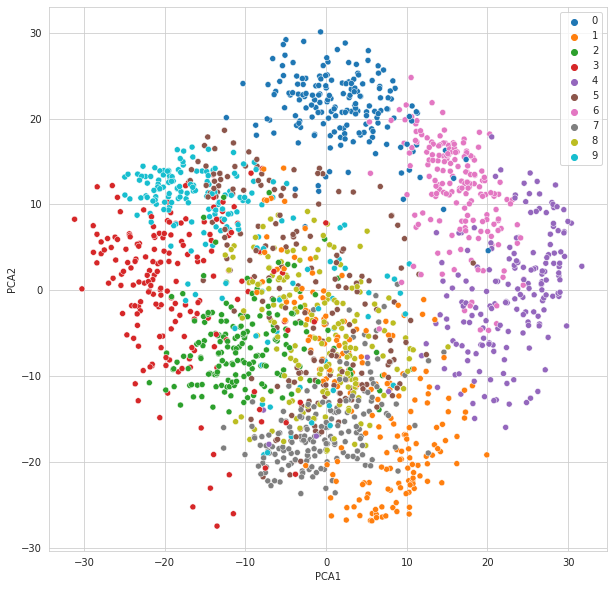

In [33]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(digits_pca.PCA1, y=digits_pca.PCA2, 
                hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

### Inverse transform
PCA can also be understood as a form of data compression, the `inverse_transform` method is used to convert from the PCA space back. Try to change the number of components and watch the appearance of the reconstructed digit 1 change.

In [34]:
digits_from_pca = pca.inverse_transform(digits_pca)
digits_from_pca

array([[ 1.18974834e-15,  9.71423065e-02,  4.96370054e+00, ...,
         4.68963092e+00, -2.32562004e-01, -5.71321254e-01],
       [-8.91793934e-16,  2.42372419e-01,  2.85356300e+00, ...,
         7.78522071e+00,  3.50042876e+00,  1.06361335e+00],
       [-6.06035520e-16, -1.63415273e-01,  8.23932800e-01, ...,
         9.49245715e+00,  3.62264911e+00,  3.48060610e-01],
       ...,
       [-5.85855079e-17,  9.65723722e-02,  2.27239217e+00, ...,
         8.21481537e+00,  3.24594200e+00,  5.81401047e-01],
       [ 7.19943186e-16, -7.15894319e-03,  3.50952907e+00, ...,
         8.95909763e+00,  1.39503123e+00,  2.26457051e-01],
       [ 3.61296989e-16,  2.41846392e-01,  4.68685352e+00, ...,
         1.29149736e+01,  4.82448953e+00,  8.15606554e-01]])

In [35]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415]),
 0.5449635266933277)

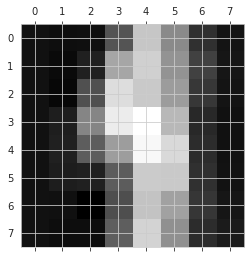

In [36]:
plt.matshow(digits_from_pca[42].reshape(8,8));

### t-SNE

t-SNE (T-distributed Stochastic Neighbor Embedding) is another technique for imaging multidimensional data in two or three dimensions.

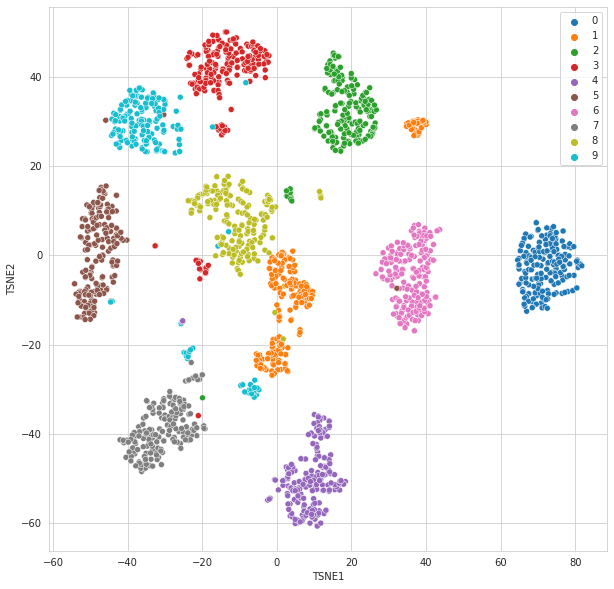

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
digits_tsne = pd.DataFrame(tsne.fit_transform(digits_df), columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10,10)) 
sns.scatterplot(x=digits_tsne.TSNE1, y=digits_tsne.TSNE2, 
                hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

## Movie ratings
Note that throughout today&#39;s lesson, we worked with data that was made on the PCA. But what to do if, for example, the data contains missing values?
We demonstrate the problem in the evaluation of 50 films by 100 viewers, which are selected from the database [Movie Lens] (https://grouplens.org/datasets/movielens/).

In [38]:
url_ratings = 'http://github.com/simecek/naucse.python.cz/blob/master/lessons/pydata/pca/static/ML_small.csv?raw=true'
ratings = pd.read_csv(url_ratings)

print(ratings.shape)
ratings.head()

(50, 101)


title  User1  User7  User13  User43  User44  User59  \
0       Air Force One (1997)    NaN    4.0     1.0     5.0     NaN     NaN   
1               Alien (1979)    5.0    4.0     4.0     NaN     4.0     5.0   
2              Aliens (1986)    5.0    3.0     3.0     NaN     5.0     5.0   
3  Back to the Future (1985)    5.0    5.0     5.0     4.0     4.0     5.0   
4       Birdcage, The (1996)    4.0    3.0     1.0     5.0     2.0     4.0   

   User62  User64  User92  ...  User864  User880  User881  User883  User889  \
0     NaN     3.0     NaN  ...      NaN      3.0      NaN      NaN      3.0   
1     4.0     5.0     4.0  ...      4.0      NaN      4.0      5.0      3.0   
2     5.0     4.0     5.0  ...      5.0      5.0      4.0      4.0      NaN   
3     3.0     NaN     4.0  ...      5.0      5.0      4.0      4.0      4.0   
4     NaN     NaN     3.0  ...      4.0      4.0      3.0      NaN      NaN   

   User892  User896  User913  User916  User919  
0      4.0      2.0      NaN      NaN      4.0  
1      5.0      4.0      4.0      4.0      3.0  
2      5.0      5.0      5.0      4.0      NaN  
3      4.0      4.0      4.0      3.0      4.0  
4      4.0      3.0      3.0      NaN      4.0  

[5 rows x 101 columns]

In [39]:
scaler = StandardScaler()
ratings_scaled = scaler.fit_transform(ratings.drop(columns='title'))

### Probability PCA
Probabilistic PCA allows us to supplement the missing observations. In Python, it is implemented in the PyPPCA library.

In [40]:
# pip install PyPPCA # uncomment the package installation# unfortunately does not work in Windowsfrom pyppca import ppca

In [41]:
# marking according to ppcaC, ss, M, X, Ye = ppca(ratings_scaled, 2, False)

/home/petr/.pyenv/versions/3.8.1/envs/pca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



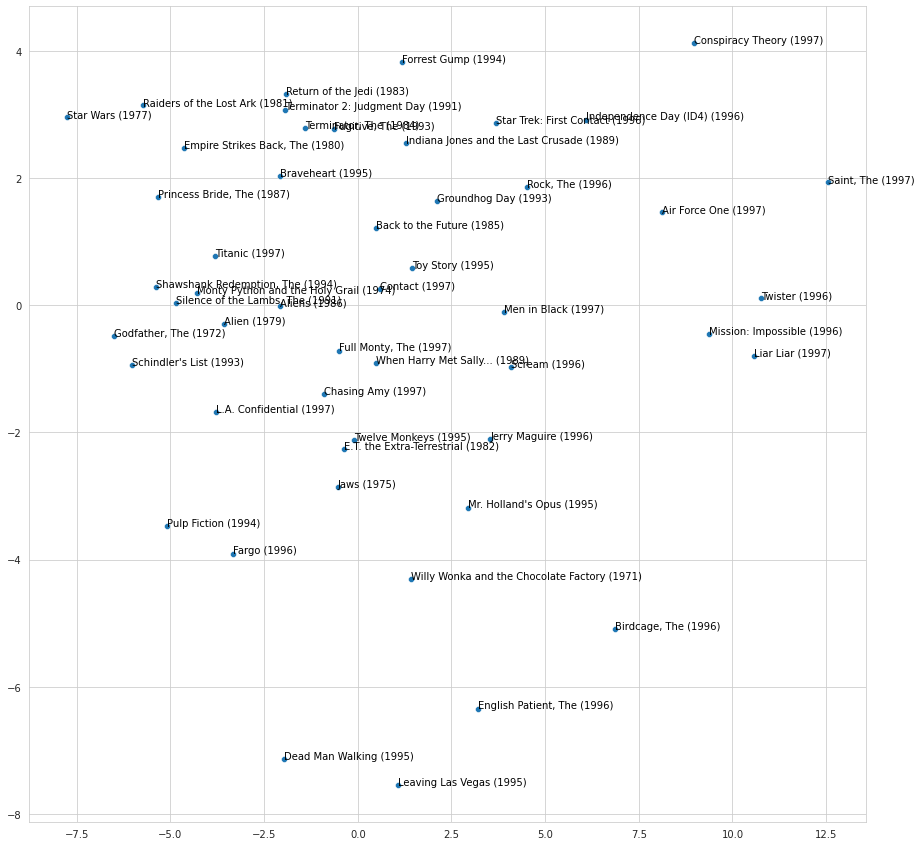

In [42]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(X[:,0], y=X[:,1])
for title, x, y in zip(ratings.title.values, X[:,0], X[:,1]):
    ax.text(x, y, title, size='medium', color='black')

### Imputation of missing values
Another option is to try to fill in the missing values. The `sklearn` library offers us the` SimpleImputer` and `IterativeImputer` functions for this purpose.

In [43]:
# from sklearn.experimental import enable_iterative_imputer   # uncomment for iterative imputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(missing_values=np.nan, max_iter=20, random_state=0)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

ratings_imp = imp.fit_transform(ratings_scaled)
pd.DataFrame(ratings_imp, columns=ratings.columns[1:], index=ratings.title).head()

User1     User7    User13        User43  \
title                                                                       
Air Force One (1997)      -4.002646e-16 -0.204124 -2.202152  1.250000e+00   
Alien (1979)               7.365022e-01 -0.204124  0.281875 -6.634260e-16   
Aliens (1986)              7.365022e-01 -1.224745 -0.546134 -6.634260e-16   
Back to the Future (1985)  7.365022e-01  0.816497  1.109884 -8.000000e-01   
Birdcage, The (1996)      -5.962160e-01 -1.224745 -2.202152  1.250000e+00   

                                 User44        User59        User62  \
title                                                                 
Air Force One (1997)       2.380791e-16 -4.829470e-16  1.570559e-16   
Alien (1979)               2.779924e-02  6.135420e-01  1.833397e-01   
Aliens (1986)              1.056371e+00  6.135420e-01  1.122956e+00   
Back to the Future (1985)  2.779924e-02  6.135420e-01 -7.562763e-01   
Birdcage, The (1996)      -2.029344e+00 -6.781254e-01  1.570559e-16   

                                 User64        User92        User94  ...  \
title                                                                ...   
Air Force One (1997)      -1.155686e+00 -2.094284e-16 -2.061843e-16  ...   
Alien (1979)               1.218155e+00  1.995019e-01  1.241532e+00  ...   
Aliens (1986)              3.123475e-02  1.296762e+00  5.643326e-02  ...   
Back to the Future (1985) -1.519253e-16  1.995019e-01  5.643326e-02  ...   
Birdcage, The (1996)      -1.519253e-16 -8.977584e-01 -1.128665e+00  ...   

                                User864       User880       User881   User883  \
title                                                                           
Air Force One (1997)      -6.459479e-16 -1.660308e+00  2.103580e-16  0.000000   
Alien (1979)              -1.322876e+00  5.160014e-16  2.215395e-01  1.241639   
Aliens (1986)              7.559289e-01  1.096430e+00  2.215395e-01  0.000000   
Back to the Future (1985)  7.559289e-01  1.096430e+00  2.215395e-01  0.000000   
Birdcage, The (1996)      -1.322876e+00 -2.819392e-01 -8.307732e-01  0.000000   

                                User889   User892   User896       User913  \
title                                                                       
Air Force One (1997)      -1.266626e+00 -0.899735 -1.651002  7.077672e-17   
Alien (1979)              -1.266626e+00  1.111438  0.127000  2.121910e-01   
Aliens (1986)              1.554312e-16  1.111438  1.016001  1.155262e+00   
Back to the Future (1985)  3.677300e-01 -0.899735  0.127000  2.121910e-01   
Birdcage, The (1996)       1.554312e-16 -0.899735 -0.762001 -7.308801e-01   

                                User916       User919  
title                                                  
Air Force One (1997)      -1.992708e-17  1.601282e-01  
Alien (1979)               2.769244e-01 -8.006408e-01  
Aliens (1986)              2.769244e-01 -1.649915e-16  
Back to the Future (1985) -8.030807e-01  1.601282e-01  
Birdcage, The (1996)      -1.992708e-17  1.601282e-01  

[5 rows x 100 columns]

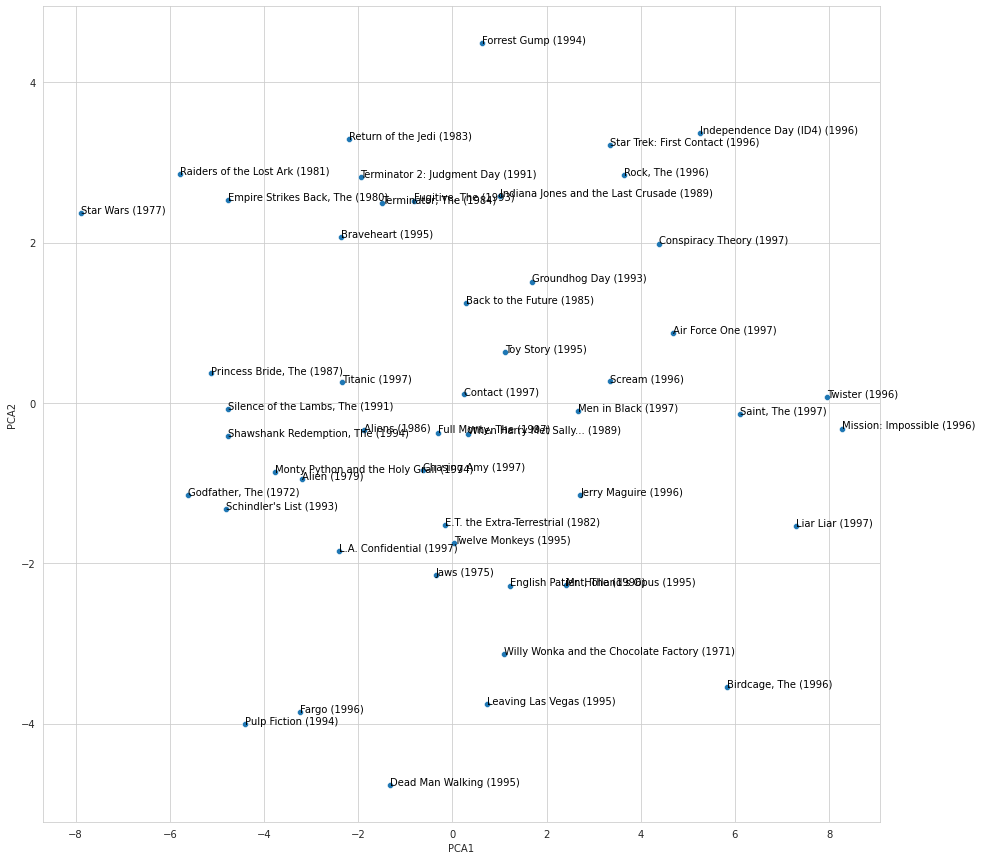

In [44]:
pca = PCA(n_components=2)
ratings_pca = pd.DataFrame(pca.fit_transform(ratings_imp), columns=['PCA1', 'PCA2'])

plt.figure(figsize=(15,15))
ax = sns.scatterplot(x=ratings_pca.PCA1, y=-ratings_pca.PCA2)
for title, x, y in zip(ratings.title.values, ratings_pca.PCA1, -ratings_pca.PCA2):
    ax.text(x, y, title, size='medium', color='black')

## Hierarchical clustering and heatmaps
The PCA graph is not the only method to capture the relationships between individual observations of multidimensional data. Probably the most common alternative is a heatmap supplemented by hierarchical clustering dendrograms, as you can see in the image below.
Note that, as with the PCA, we see three clear clusters of wine samples.

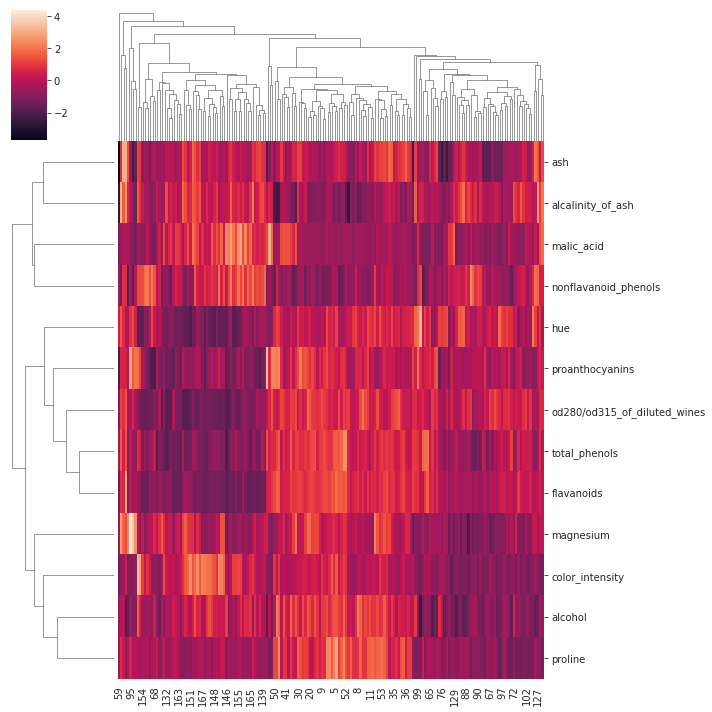

In [45]:
sns.clustermap(pd.DataFrame(wine_df_scaled, columns=wine_df.columns).T);

## Summary and concluding remarks
In this notebook, we have learned to apply Principal Component Analysis (PCA) to multidimensional data in order to graphically represent or reduce the size of the data (to speed up the calculation or save memory).
Related PCA topics that didn&#39;t fit here anymore:* [Linear Discriminant Analysis] (https://en.wikipedia.org/wiki/Linear_discriminant_analysis) a technique related to PCA, where it maximizes not much of the explained variability, but the amount of information relative to another (dependent) variable* [Correspondence Analysis] (https://en.wikipedia.org/wiki/Correspondence_analysis) technique similar to PCA but applied to categorical, not continuous data* [Factor analysis] (https://en.wikipedia.org/wiki/Factor_analysis): method used mainly in psychology and psychometry, mathematical model different, but also helps to detect factors behind multidimensional data* [Biplot] (https://en.wikipedia.org/wiki/Biplot) PCA graph, where in addition to observations there are also vectors of characteristics (often used in R)* Two or three dimensional PCA? For an interactive graph, it can sometimes be a good idea to draw a 3-dimensional PCA. Otherwise, the 3-dimensional graph may &quot;look good&quot;, but otherwise you will lose information by turning it.* Non-specific filtering characteristics: if you know that a large part of your columns are constant, irrelevant, etc. it may be a good idea to filter them out before PCA (eg by variance)* If you want to know more about PCA, read the [relevant chapter] (https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) from the Data Science Handbook* We mentioned hierarchical clustering, but we don&#39;t have time for [k-Means clustering] (https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)* And if you need to explain the PCA to your grandmother, see [CrossValidated] (https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579).